In [1]:
# 
# import idx2numpy
# import matplotlib.pyplot as plt
# 

# imagefile = 'train-images-idx3-ubyte'
# imagearray = idx2numpy.convert_from_file(imagefile)

# plt.imshow(imagearray[30], cmap=plt.cm.binary)

In [66]:
df = pd.read_csv('fashion-mnist_train.csv')
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# y_train = df['label']
# x_train = df.drop('label', axis = 1)

In [4]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn import tree, metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingRegressor
import xgboost
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score,cross_val_predict, GridSearchCV, RandomizedSearchCV
import matplotlib.pyplot as plt
# from sklearn.svm import SVC
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from termcolor import colored
import seaborn as sns

In [5]:
from tensorflow.keras.datasets import fashion_mnist
(X_train, Y_train),(X_test, Y_test) = fashion_mnist.load_data()

In [6]:
Names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

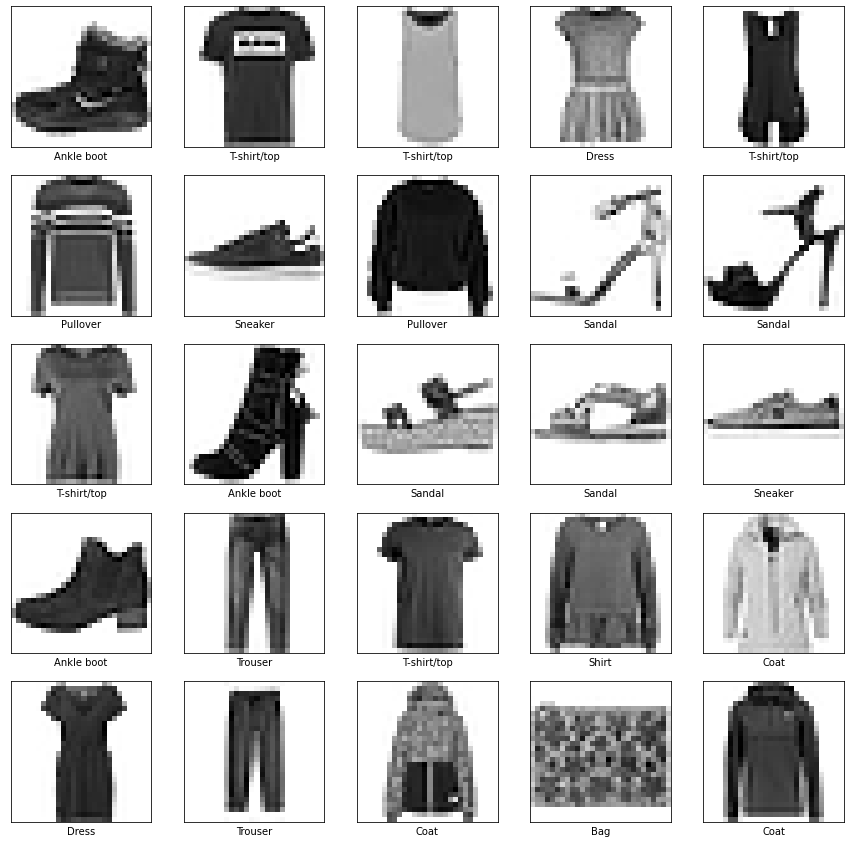

In [7]:
plt.figure(figsize=(15,15))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(Names[Y_train[i]])
plt.show()

In [40]:
naive_model = GaussianNB()
Rf_model = RandomForestClassifier(criterion = 'entropy', max_depth = 9, max_features = 'sqrt', min_samples_leaf = 1, min_samples_split = 3, n_estimators = 350)
Dt_model = tree.DecisionTreeClassifier(criterion = 'gini', max_depth = 14, min_samples_leaf = 3, min_samples_split = 4)
voting_model = VotingClassifier(estimators = [('nb', naive_model), ('rf', Rf_model), ('dt', Dt_model),],
                                voting = 'soft')

In [41]:
scaler = MinMaxScaler()
scaler2 = StandardScaler()

In [42]:
X_train_reshaped = X_train.reshape(60000, 784)

In [43]:
X_train_scaled = scaler.fit_transform(X_train_reshaped)

In [44]:
X_train_scaled2 = scaler2.fit_transform(X_train_reshaped)

there is a function called as_dataframe that convert tensorflow file to dataframe, and there are some features with the load function in tensorflow.

I need to learn cross_val_score to 

In [45]:
# X_test_train = cross_val_predict(voting_model, X_train_scaled, Y_train)
# X_test_train2 = cross_val_predict(voting_model, X_train_scaled2, Y_train)

In [46]:
classifiers = {"naive_bayes": naive_model, 
               "Random_forest": Rf_model, 
               "Decision_tree": Dt_model,
               "voting": voting_model}

In [47]:
# f, axes = plt.subplots(1, 5, figsize=(20, 5), sharey='row')
# for i, (key, classifier) in enumerate(classifiers.items()):
#     y_pred = classifier.fit(X_train_scaled, Y_train).predict(X_test_train.reshape(-1, 1))
#     cf_matrix = metrics.confusion_matrix(X_test_train, y_pred)
#     disp = metrics.ConfusionMatrixDisplay(cf_matrix)
#     disp.plot(ax=axes[i], xticks_rotation=45)
#     disp.ax_.set_title(key)
#     disp.im_.colorbar.remove()
#     disp.ax_.set_xlabel('predicted label')
#     disp.ax_.set_ylabel('True label')

# f.colorbar(disp.im_, ax=axes)
# plt.show()

# Tunning models

In [48]:
# param_grid_random = { 
#     'n_estimators': range(50,551,50),
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'max_depth' : range(1,10),
#     'criterion' :['gini', 'entropy'],
#     "min_samples_split": range(1,5), 
#     "min_samples_leaf": range(1,5)
# }

# rsc1 = RandomizedSearchCV(Rf_model, param_grid_random, n_iter = 20, cv = 10)
# rsc1.fit(X_train_scaled, Y_train)

In [49]:
# param_grid_random = { 
#     'n_estimators': range(50,551,50),
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'max_depth' : range(1,10),
#     'criterion' :['gini', 'entropy'],
#     "min_samples_split": range(1,5), 
#     "min_samples_leaf": range(1,5)
# }

# rsc2 = RandomizedSearchCV(Rf_model, param_grid_random, n_iter = 20, cv = 10)
# rsc2.fit(X_train_scaled2, Y_train)

In [50]:
# param_grid_RF = { 
#     'n_estimators': range(150,351,50),
#     "min_samples_split": range(2,4),
#     "min_samples_leaf": range(1,3),
#     'max_features': ['sqrt'],
#     'max_depth' : range(7,10),
#     'criterion' :['entropy']
# }

# clf1 = GridSearchCV(Rf_model, param_grid = param_grid_RF, cv = 10)
# clf1.fit(X_train_scaled, Y_train)

In [51]:
# print("The best parameter for randomForest model is:",clf1.best_params_," and its score was",clf1.best_score_)

In [52]:
# param_grid_RF = { 
#     'n_estimators': range(150,351,50),
#     "min_samples_split": range(2,4),
#     "min_samples_leaf": range(1,3),
#     'max_features': ['sqrt'],
#     'max_depth' : range(7,10),
#     'criterion' :['entropy']
# }

# clf2 = GridSearchCV(Rf_model, param_grid = param_grid_RF, cv = 10)
# clf2.fit(X_train_scaled2, Y_train)

In [53]:
# print("The best parameter for randomForest model is:",clf2.best_params_," and its score was",clf2.best_score_)

In [54]:
X_test_scaled = scaler.transform(X_test.reshape(10000, 784))

In [55]:
models = [naive_model, Rf_model, Dt_model, voting_model]

In [56]:
for model in models:
    model.fit(X_train_scaled, Y_train)
    y_pred_train = model.predict(X_train_scaled)
    y_pred_test = model.predict(X_test_scaled)
    print(f'The accuracy score in the train set for {models[model]} model is', accuracy_score(Y_train, y_pred_train))
    print(f'The accuracy score in the test set for {models[model]} model is', accuracy_score(Y_test, y_pred_test))

The accuracy score in the train set for GaussianNB() model is 0.58515
The accuracy score in the test set for GaussianNB() model is 0.5838
The accuracy score in the train set for RandomForestClassifier(criterion='entropy', max_depth=9, max_features='sqrt',
                       min_samples_split=3, n_estimators=350) model is 0.86625
The accuracy score in the test set for RandomForestClassifier(criterion='entropy', max_depth=9, max_features='sqrt',
                       min_samples_split=3, n_estimators=350) model is 0.839
The accuracy score in the train set for DecisionTreeClassifier(max_depth=14, min_samples_leaf=3, min_samples_split=4) model is 0.9139333333333334
The accuracy score in the test set for DecisionTreeClassifier(max_depth=14, min_samples_leaf=3, min_samples_split=4) model is 0.8098
The accuracy score in the train set for VotingClassifier(estimators=[('nb', GaussianNB()),
                             ('rf',
                              RandomForestClassifier(criterion='e

In [60]:
ada_clf = AdaBoostClassifier(
tree.DecisionTreeClassifier(max_depth=1), n_estimators=200,
algorithm="SAMME.R", learning_rate=0.021)
ada_clf.fit(X_train_scaled, Y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.021, n_estimators=200)

In [62]:
y_pred = ada_clf.predict(X_test_scaled)

In [65]:
accuracy_score(Y_test, y_pred)

0.5645

In [70]:
X_train_scaled[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     